# Lesson 5: Coding and Financial Analysis

In this lesson , You will learn how to add coding capabilities to your agents and use the generated code to complete a financial analysis task .

You will build two agents systems where agents collaborate to solve the task at hand while asking for human feedback

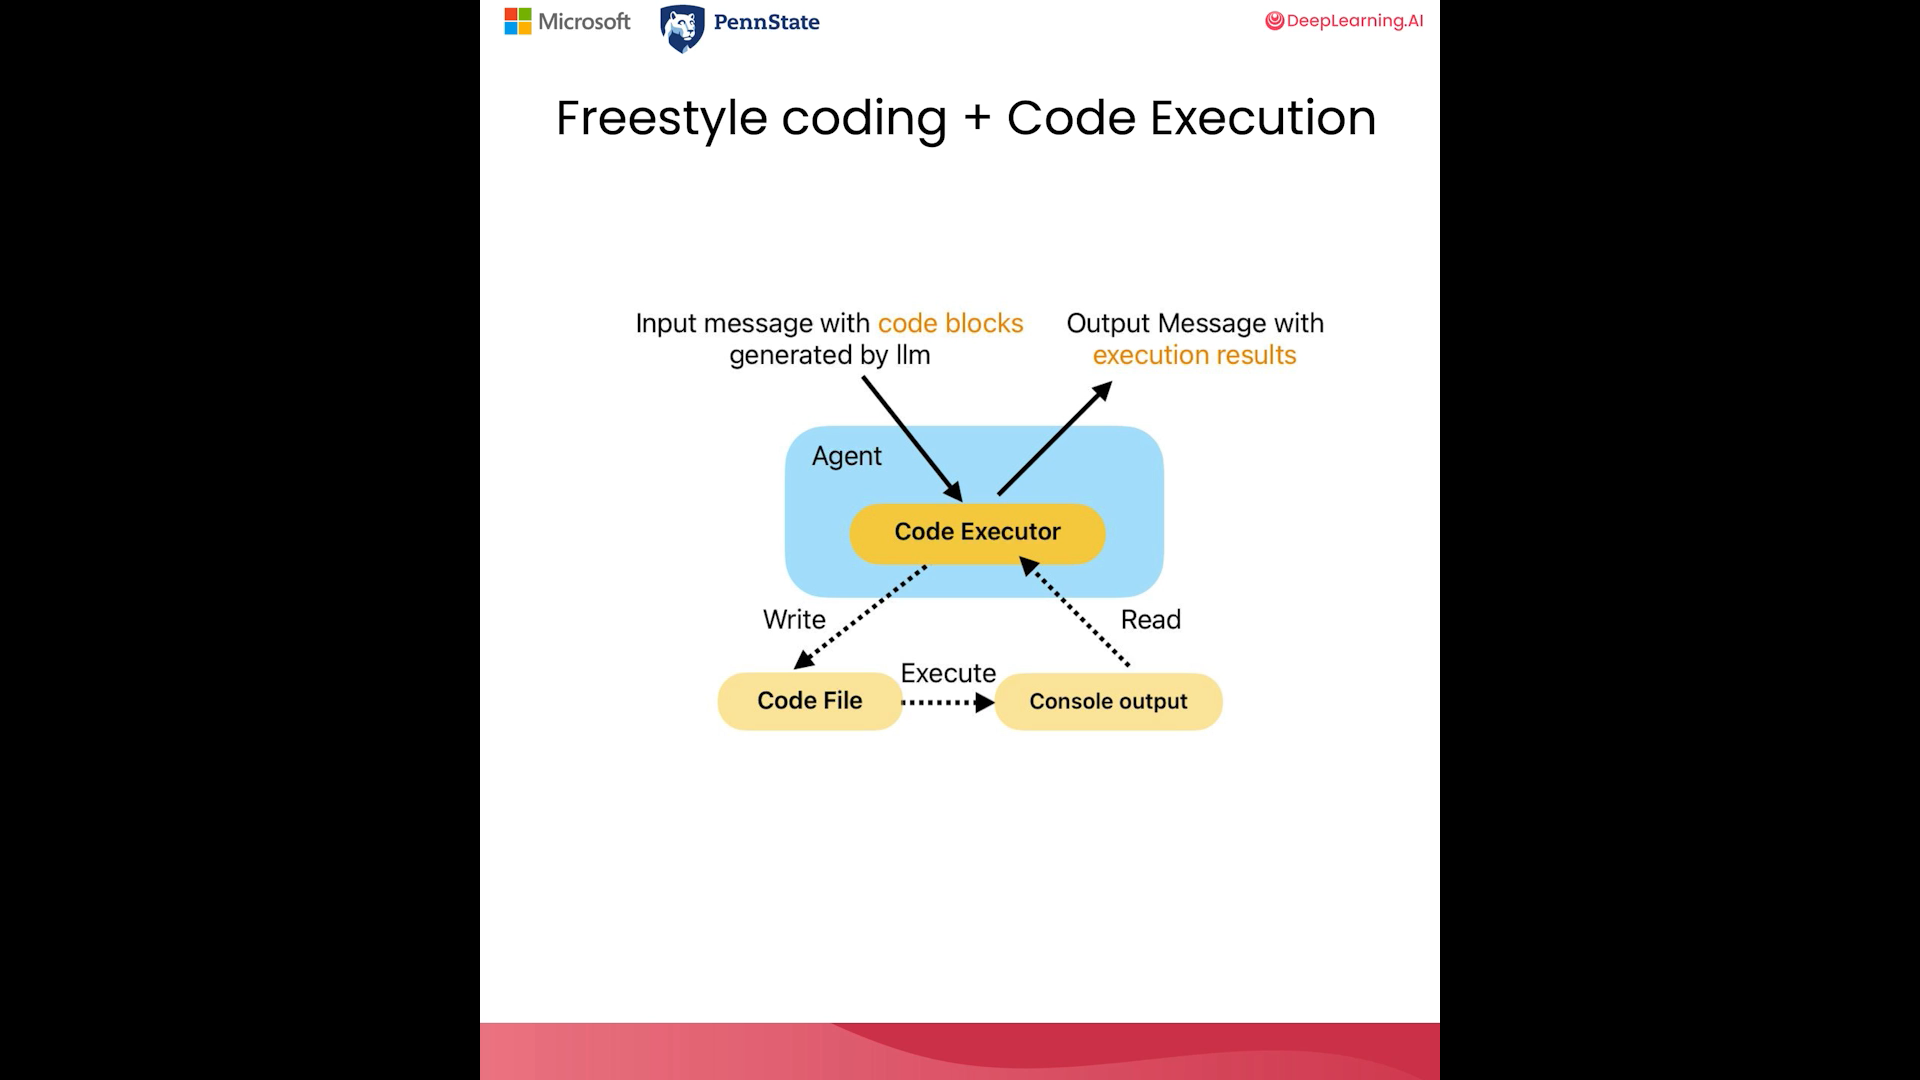

## Setup

In [1]:
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor

In [12]:
from autogen.coding import LocalCommandLineCodeExecutor

In [13]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

## Create agents 

In [14]:
from autogen import ConversableAgent, AssistantAgent

### 1. Agent with code executor configuration

In [15]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [16]:
code_executor_agent_system_message = code_executor_agent.system_message
print(code_executor_agent_system_message)

You are a helpful AI Assistant.


### 2. Agent with code writing capability

In [17]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent", ## Default code writer agent created by autogen
    llm_config=llm_config,
    code_execution_config=False, ### This agent will not execute the code
    human_input_mode="NEVER",
)

In [18]:
code_writer_agent_system_message = code_writer_agent.system_message

In [19]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## The task!

Ask the two agents to collaborate on a stock analysis task.

In [20]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might see a different set of outputs than those shown in the video. The agents collaborate to generate the code needed for your task, and they might produce code with errors in the process. However, they will ultimately provide a correct code in the end.

In [21]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-07-25. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the Year-To-Date (YTD) gain for the stocks of Nvidia (NVDA) and Tesla (TSLA) as of July 25, 2024, we need stock price data from the beginning of 2024 up to the specified date. We can utilize libraries such as `pandas` for handling data, `pandas_datareader` for fetching financial data, and `matplotlib` for plotting. 

Here's the step-by-step plan:
1. Import necessary libraries.
2. Fetch stock price data for NVDA and TSLA from January 1, 2024, to July 25, 2024.
3. Calculate YTD gain percentage.
4. Plot the data and save the figure to 'ytd_stock_gains.png'.

Please execute the following Python script to accomplish this:

```p


--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output:   File "/home/jovyan/work/L5/coding/generate_stock_plot.py", line 24
    plt.plot(nvda_ytd.index, nvda_ydd.values, das_label='NVDET GY5N Gain fraud
                                                        ^
SyntaxError: unterminated string literal (detected at line 24)


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

It looks like there was an issue with some malformed and corrupted content in the previous Python script snippet I provided. Let's correct that and provide a clean, structured script 

code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 
[*********************100%%**********************]  1 of 1 completed

[*********************100%%**********************]  1 of 1 completed
Figure(1000x600)


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The script has succeeded in executing, and it successfully generated and saved the plot displaying the Year-To-Date (YTD) stock gains for NVDA and TSLA as a file named 'ytd_stock_gains.png'.

Since the process is complete and the plot has been saved successfully, there should be no further actions needed unless you have additional requests.

TERMINATE

--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: exit


## Let's see the plot!

**Note**: 
* Your plot might differ from the one shown in the video because the LLM's freestyle code generation could choose a different plot type, such as a bar plot. 
* You can re-run the previous cell and check the generated code. If it produces a bar plot, remember you can directly specify your preference by asking for a specific plot type instead of a bar plot.

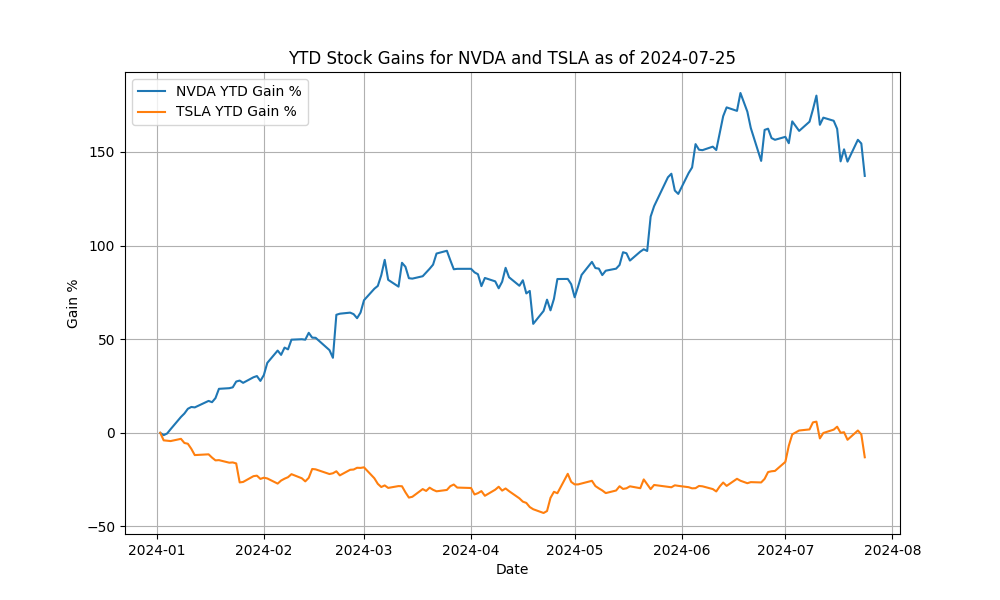

In [22]:
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data 
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

In [23]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [24]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [30]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding_predefined",
    functions=[get_stock_prices, plot_stock_prices],
)

In [31]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [32]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [33]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [34]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-07-25.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

First, I will provide a code to download the Year-to-Date (YTD) stock prices for the companies NVDA (NVIDIA Corporation) and TSLA (Tesla, Inc.) up to today's date (2024-07-25) using the function `get_stock_prices`. Then, we will use another function, `plot_stock_prices`, to create and save the plot to a file named `stock_prices_YTD_plot.png`.

Here's the code block that accomplishes both these tasks:

```python
# filename: fetch_and_plot_stocks.py
from functions import get_stock_prices, plot_stock_info
import pandas as pd
from datetime import datetime

# Get today's date as string
today_date = "2024-07-25"

# Start date for Year-To-

### Plot the results

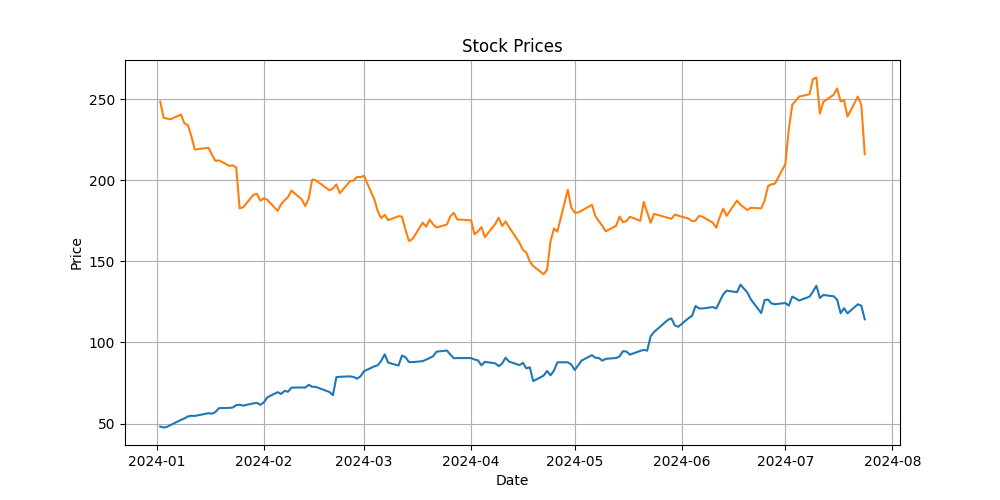

In [36]:
Image(os.path.join("coding_predefined", "stock_prices_YTD_plot.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.